In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

from nltk.cluster import KMeansClusterer, cosine_distance

import json
from numpy.random import shuffle

import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


from sklearn.decomposition import LatentDirichletAllocation

from scipy.cluster.hierarchy import cut_tree

from sklearn import metrics
import numpy as np

import csv

from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage,dendrogram
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.metrics.pairwise import cosine_similarity


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.decomposition import LatentDirichletAllocation

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import math

In [17]:
#Selecting Each company and running one model for all
list_to_use1 = ['Microsoft','Netflix','amazon','Boeing','Google','Facebook']
for company in list_to_use1:
    with open("C:/Users/rajpu/Desktop/Web analytics Final/Data/"+company+".csv", "r") as f:
        reader=csv.reader(f, delimiter=',') 
        rows=[(row[1][2],row[1][4]) \
          for row in enumerate(reader)]
    shuffle(rows)
#rows
    text,label=zip(*rows)
    text=list(text)
    label=list(label)
   
    # LDA can only use raw term counts for LDA 
    tf_vectorizer = CountVectorizer(max_df=0.90, \
                    min_df=10, stop_words='english')
    tf = tf_vectorizer.fit_transform(text)
    
    # each feature is a word (bag of words)
    # get_feature_names() gives all words
    tf_feature_names = tf_vectorizer.get_feature_names()
    
    print(tf_feature_names[0:10])
    print(tf.shape)
    
    
    # split dataset into train (90%) and test sets (10%)
    # the test sets will be used to evaluate proplexity of topic modeling
    X_train, X_test = train_test_split(\
                    tf, test_size=0.1, random_state=0)
    
    num_topics = 1

    # Run LDA. For details, check
    # http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html#sklearn.decomposition.LatentDirichletAllocation.perplexity

    # max_iter control the number of iterations 
    # evaluate_every determines how often the perplexity is calculated
    # n_jobs is the number of parallel threads
    lda = LatentDirichletAllocation(n_components=num_topics, \
                                        max_iter=10,verbose=1,
                                        evaluate_every=1, n_jobs=1,
                                        random_state=0).fit(tf)
    num_top_words=20
    print(company)

    # lda.components_ returns a KxN matrix
    # for word distribution in each topic.
    # Each row consists of 
    # probability (counts) of each word in the feature space

    for topic_idx, topic in enumerate(lda.components_):
        print ("Topic %d:" % (topic_idx))
        # print out top 20 words per topic 
        words=[(tf_feature_names[i],topic[i]) for i in topic.argsort()[::-1][0:num_top_words]]
        print(words)
        print("\n")


['10', '2018', 'according', 'based', 'business', 'chief', 'companies', 'company', 'editing', 'feedback']
(20, 31)
iteration: 1 of max_iter: 10, perplexity: 28.1993
iteration: 2 of max_iter: 10, perplexity: 27.6098
iteration: 3 of max_iter: 10, perplexity: 27.4423
iteration: 4 of max_iter: 10, perplexity: 27.3720
Microsoft
Topic 0:
[('percent', 57.512661200015131), ('year', 45.392273390224673), ('company', 39.091064340720962), ('companies', 32.774207910604275), ('new', 30.694105119150301), ('investors', 28.924505840743294), ('business', 23.739929841081548), ('market', 22.801821147116414), ('according', 22.780205568492232), ('page', 22.646276538733332), ('technology', 21.605268618280729), ('years', 18.473350357805803), ('2018', 17.416020965077671), ('chief', 15.829571593591929), ('think', 15.738123852160104), ('york', 13.692735848063542), ('tell', 13.144775517473587), ('feedback', 12.651956473933797), ('reporting', 12.167367001139139), ('interested', 12.097524861228253)]


['10', '12', '

C:\Users\rajpu\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\Users\rajpu\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


['000', '10', '100', '11', '12', '13', '14', '15', '16', '17']
(73, 677)
iteration: 1 of max_iter: 10, perplexity: 557.5093
iteration: 2 of max_iter: 10, perplexity: 544.9489
iteration: 3 of max_iter: 10, perplexity: 541.3756
iteration: 4 of max_iter: 10, perplexity: 539.8752
iteration: 5 of max_iter: 10, perplexity: 539.1198
iteration: 6 of max_iter: 10, perplexity: 538.6962
iteration: 7 of max_iter: 10, perplexity: 538.4408
iteration: 8 of max_iter: 10, perplexity: 538.2785
iteration: 9 of max_iter: 10, perplexity: 538.1711
iteration: 10 of max_iter: 10, perplexity: 538.0979
amazon
Topic 0:
[('company', 265.40721828147366), ('percent', 235.64226143083749), ('mr', 185.01730056165948), ('year', 183.38652517101525), ('billion', 173.76245999022601), ('companies', 159.32294960896016), ('new', 157.71895344018407), ('trump', 148.86820658031451), ('business', 138.43870471504118), ('million', 108.68968452185355), ('sales', 103.88296989130841), ('like', 103.04291637526936), ('market', 102.2796

C:\Users\rajpu\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\Users\rajpu\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Boeing
Topic 0:
[('percent', 118.6413624950148), ('new', 104.52288210487549), ('trump', 90.426576282609261), ('year', 77.084033787361761), ('trade', 73.598741554302165), ('company', 63.669843528652855), ('president', 62.945146366416246), ('business', 62.293640369387823), ('tariffs', 58.069299366915217), ('billion', 56.620064913296837), ('companies', 48.909469613218413), ('airbus', 47.53418415986863), ('million', 46.777261713544107), ('united', 43.948565735893141), ('china', 43.921176759606581), ('steel', 40.435693117629995), ('house', 39.759525607431634), ('market', 39.104559163930254), ('states', 39.041602339453298), ('aluminum', 37.665038893221293)]


['10', '12', '2016', 'according', 'added', 'alphabet', 'amazon', 'based', 'big', 'billion']
(25, 59)
iteration: 1 of max_iter: 10, perplexity: 55.5355
iteration: 2 of max_iter: 10, perplexity: 54.2378
iteration: 3 of max_iter: 10, perplexity: 53.8653
iteration: 4 of max_iter: 10, perplexity: 53.7084
iteration: 5 of max_iter: 10, perplex

C:\Users\rajpu\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\Users\rajpu\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


In [18]:
num_top_words=20

# lda.components_ returns a KxN matrix
# for word distribution in each topic.
# Each row consists of 
# probability (counts) of each word in the feature space

for topic_idx, topic in enumerate(lda.components_):
    print ("Topic %d:" % (topic_idx))
    # print out top 20 words per topic 
    words=[(tf_feature_names[i],topic[i]) for i in topic.argsort()[::-1][0:num_top_words]]
    print(words)
    print("\n")

Topic 0:
[('percent', 197.06820559034765), ('mr', 190.6139876664098), ('company', 180.21844767189921), ('new', 176.15398512486664), ('companies', 171.35997653174275), ('year', 164.92585736475797), ('trump', 136.0011301848341), ('billion', 133.61102581407994), ('nyt', 113.49619180465997), ('million', 111.12472167413046), ('like', 104.67814172857975), ('investors', 103.06599331972099), ('business', 93.397845160985014), ('president', 90.202663890689337), ('people', 86.154382052465564), ('data', 81.364270345606954), ('deal', 80.556457264296895), ('according', 77.343652240080331), ('financial', 74.950281472127017), ('bank', 74.939219079808026)]




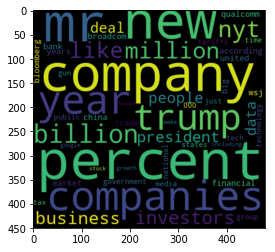

In [49]:
num_top_words=50


for topic_idx, topic in enumerate(lda.components_):
    f = {tf_feature_names[i]:topic[i] for i in
         topic.argsort()[::-1][0:num_top_words]}
    wordcloud = WordCloud(width=480,height=450,margin=0,background_color='black')
    wordcloud.generate_from_frequencies(frequencies=f)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()